# predict whether mushrooms are poisonous or edible

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Looking into the dateset using .info()

In [2]:
agaricus_lepiota = pd.read_csv("data/agaricus-lepiota.data")
agaricus_lepiota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [3]:
agaricus_lepiota.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


Renaming columns

In [4]:
agaricus_lepiota.rename(columns={'p':'classes','x':"cap-shape",'s':"Cap-surface",'n':"cap-color",
't':"bruises?",'p.1':"odor", 'f':"gill-attachment",'c':"gill-spacing",'n.1':"gill-size",'k':"gill-color",
'e':"stalk-shape", 'e.1':"stalk-root", 's.1':"stalk-surface-above-ring",'s.2':"stalk-surface-below-ring",
 'w':"stalk-color-above-ring", 'w.1':"stalk-color-below-ring",'p.2':"veil-type",'w.2':"veil-color",'o':"ring-number",'p.3':"ring-type",'k.1':"spore-print-color",'s.3':"population",'u':"habitat"}, inplace=True)

value_counts() of each column in dataset

In [5]:
for col in agaricus_lepiota.columns:
    print(agaricus_lepiota[col].value_counts())

e    4208
p    3915
Name: classes, dtype: int64
x    3655
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2555
f    2320
g       4
Name: Cap-surface, dtype: int64
n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3375
Name: bruises?, dtype: int64
n    3528
f    2160
y     576
s     576
l     400
a     400
p     255
c     192
m      36
Name: odor, dtype: int64
f    7913
a     210
Name: gill-attachment, dtype: int64
c    6811
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2511
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     407
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3515
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1119
c     556
r     192
Name: stalk-root, dtype: int64
s    5175
k    2372
f     552
y      24
Name: stalk-s

the value counts function shows that the stalk-root column has h 2480 unnusual values which is alot therefore it should be dropped, value counts also shows that the veil-type column only has one unique value this column won't add any value to the model therefore it would be dropped as well. 

In [6]:
agaricus_lepiota.drop(['stalk-root','veil-type'], axis=1,inplace=True)

In [7]:
agaricus_lepiota.isnull().values.sum()

0

In [8]:
agaricus_lepiota.describe()

,classes,cap-shape,Cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,5175,4935,4463,4383,7923,7487,3967,2388,4040,3148


In [9]:
agaricus_lepiota.classes = agaricus_lepiota.classes.map({'e':1,'p':0})

### preprocessing

converting catagorical features to numeric values using labelencoder

In [10]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in agaricus_lepiota:
    # Compare if the dtype is object
    if agaricus_lepiota[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        agaricus_lepiota[col]=le.fit_transform(agaricus_lepiota[col])

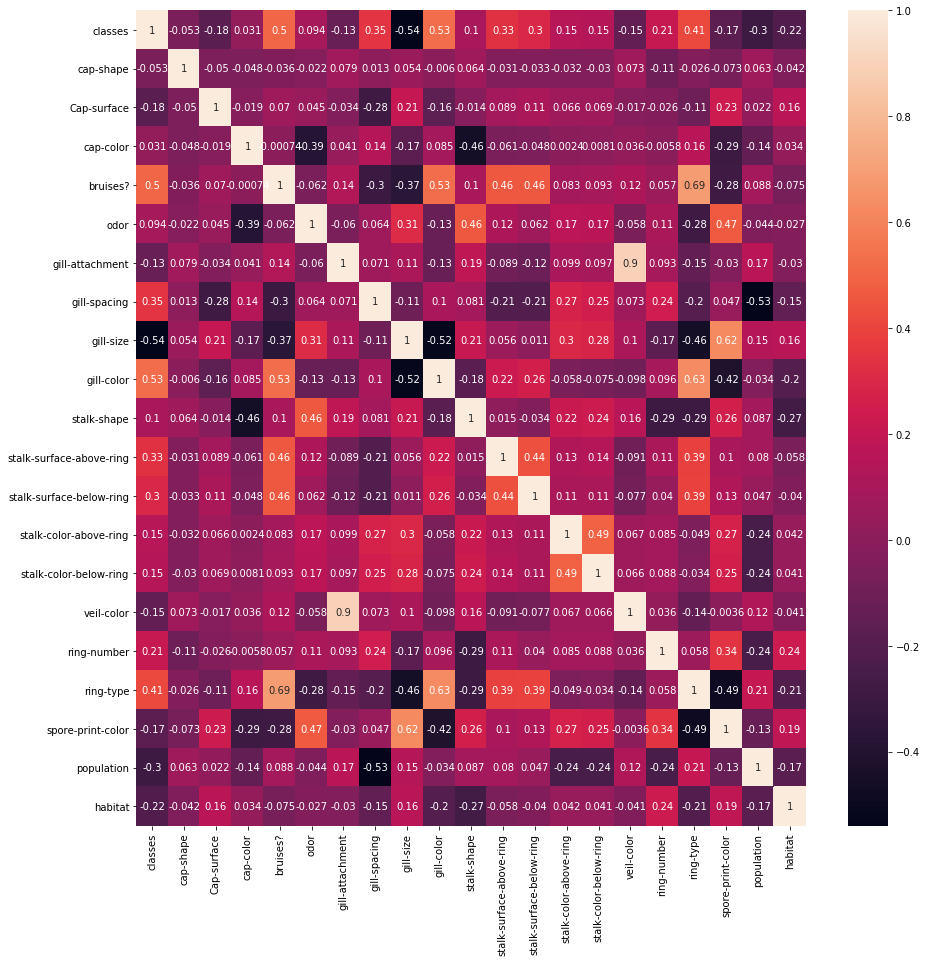

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(agaricus_lepiota.corr() , annot=True)
plt.show()

### Feature Selection

selecting 10 best features using the SelectKbest and chi2 from sklearn.feature_selection and confirming the features using ExtraTreesClassifier from sklearn.ensemble

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = agaricus_lepiota.iloc[:,1:]  #independent columns
y = agaricus_lepiota.iloc[:,0]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     columns        Score
8                 gill-color  5957.772736
16                 ring-type  1952.193916
7                  gill-size  1636.117258
3                   bruises?  1195.363289
6               gill-spacing   826.537071
19                   habitat   749.830964
17         spore-print-color   379.539422
18                population   311.938267
10  stalk-surface-above-ring   223.135648
1                Cap-surface   214.056443


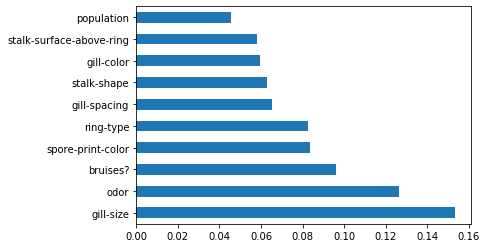

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###  The best 10 features selected by Extratreesclassifier, selectkbest and chi2 to predict whether a mushroom is poisonous are :
* gill-color
* ring-type 
* gill-size
* bruises
* stalk-shape
* gill-spacing
* habitat
* spore-print-color
* Population
* Sralk-surface-above-ring

In [14]:
# selecting best 10 features
x=agaricus_lepiota[['gill-color','ring-type','gill-size','bruises?','stalk-shape','gill-spacing','habitat','spore-print-color','population','stalk-surface-above-ring' ]]
# getting dummies for the selected features 
X =pd.get_dummies(x, drop_first=True)
y = agaricus_lepiota.classes
# spliting data set to train and test set
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3,
stratify=y,
random_state=42)

### finding the best params for decision trees model 
* using GridSearchCV from sklearn.model_selection 

In [15]:
seed=42
dt = DecisionTreeClassifier(random_state=seed)
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max

In [16]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n'
, best_hyperparams, ':\n')

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy',best_CV_score)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.04} :

Best CV accuracy 0.9454810143815442


In [17]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model:",test_acc)

Test set accuracy of best model: 0.9450143619203939


In [18]:
dt = DecisionTreeClassifier(max_depth=3, max_features=0.6, min_samples_leaf=0.04, random_state=seed)

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.04, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [20]:
y_pred = dt.predict(X_test)
accuracy_score(y_pred,y_test)

0.9450143619203939

In [21]:
ytrain_pred = dt.predict(X_train) 
accuracy_score(ytrain_pred,y_train)

0.9454801266268027

### The Accuracy report of the model on test and train set

In [22]:
from sklearn.metrics import classification_report
print('test')
print(classification_report(y_test,y_pred))
print('train')
print(classification_report(y_train,ytrain_pred))

test
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1175
           1       0.97      0.92      0.95      1262

    accuracy                           0.95      2437
   macro avg       0.95      0.95      0.95      2437
weighted avg       0.95      0.95      0.95      2437

train
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2740
           1       0.97      0.92      0.95      2946

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686



In [23]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

[[1144   31]
 [ 103 1159]]


[Text(181.35000000000002, 190.26, 'X[2] <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2740, 2946]'),
 Text(111.60000000000001, 135.9, 'X[7] <= 1.5\ngini = 0.421\nsamples = 3922\nvalue = [1180, 2742]'),
 Text(55.800000000000004, 81.53999999999999, 'X[1] <= 3.0\ngini = 0.05\nsamples = 1132\nvalue = [1103, 29]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 898\nvalue = [898, 0]'),
 Text(83.7, 27.180000000000007, 'gini = 0.217\nsamples = 234\nvalue = [205, 29]'),
 Text(167.4, 81.53999999999999, 'X[0] <= 7.5\ngini = 0.054\nsamples = 2790\nvalue = [77, 2713]'),
 Text(139.5, 27.180000000000007, 'gini = 0.02\nsamples = 1788\nvalue = [18, 1770]'),
 Text(195.3, 27.180000000000007, 'gini = 0.111\nsamples = 1002\nvalue = [59, 943]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 1.0\ngini = 0.205\nsamples = 1764\nvalue = [1560, 204]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 1202\nvalue = [1202, 0]'),
 Text(279.0, 81.53999999999999, 'X[3] <= 0.5\ng

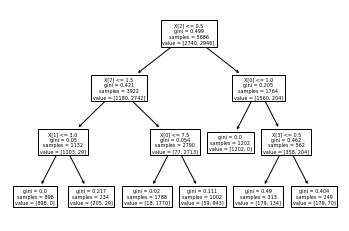

In [24]:
plot_tree(dt)